In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Load 'Players' CSV file to investigate information

In [80]:
# Read 'Players' csv file, get info from it
players = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Ml course/NBA_Stats/Players.csv', index_col=[0]).dropna()
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 1 to 3919
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3189 non-null   object 
 1   height       3189 non-null   float64
 2   weight       3189 non-null   float64
 3   collage      3189 non-null   object 
 4   born         3189 non-null   float64
 5   birth_city   3189 non-null   object 
 6   birth_state  3189 non-null   object 
dtypes: float64(3), object(4)
memory usage: 199.3+ KB


In [81]:
# Resize Players DB
players = players.astype({'height': 'int16', 'weight': 'int16', 'born': 'int16'})
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana
4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky
6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho
7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania
8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey


Build plot to visualize Players DB

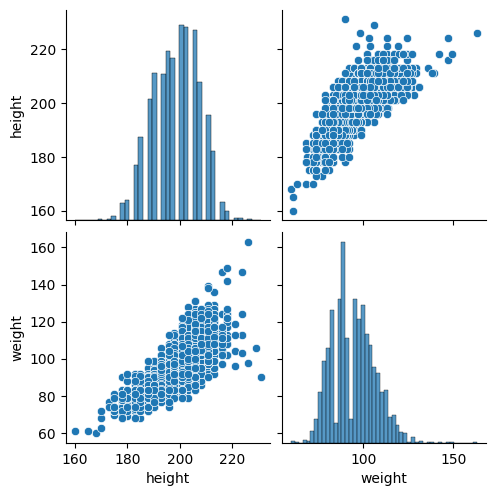

In [82]:
# Visualize plot
sb.pairplot(players[['height', 'weight']])

On the plot visualization we can see that Normal Distribution between height and weight of players has the right shape. This means that the data has good features for the training model.

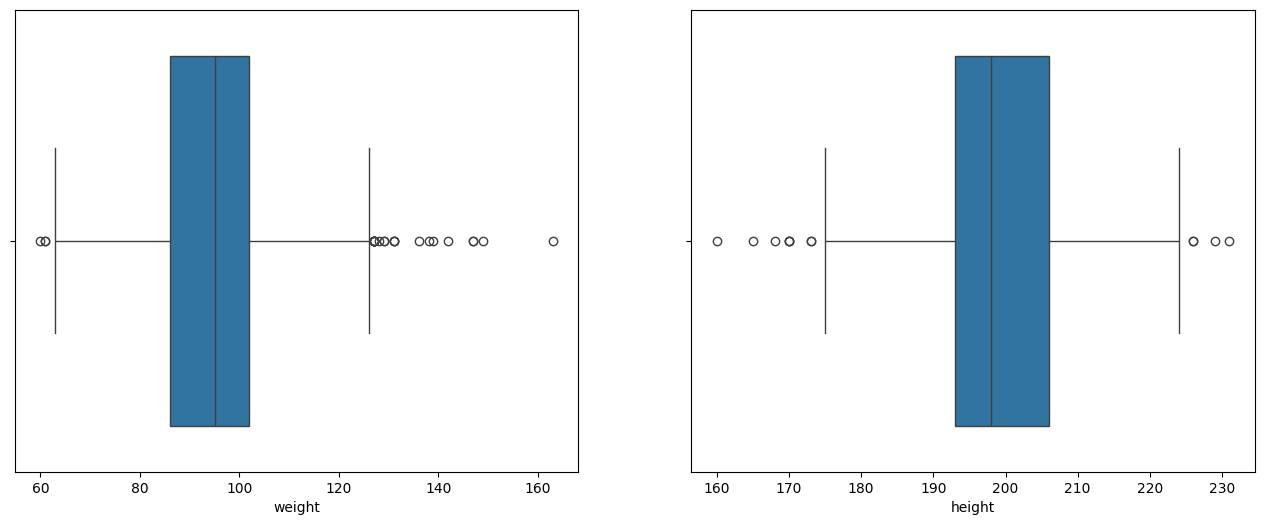

In [83]:
# Visualize boxplot

# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)

(ax1, ax2) = axes

# Plot the first line plot on the axis
sb.boxplot(data=players, x='weight', ax=ax1)

# Plot the second line plot on the axis
sb.boxplot(data=players, x='height', ax=ax2)

# Shop plots
plt.show()


In this picture we see that weight and height have a few outlayers, perhaps we need to clean our Player DB

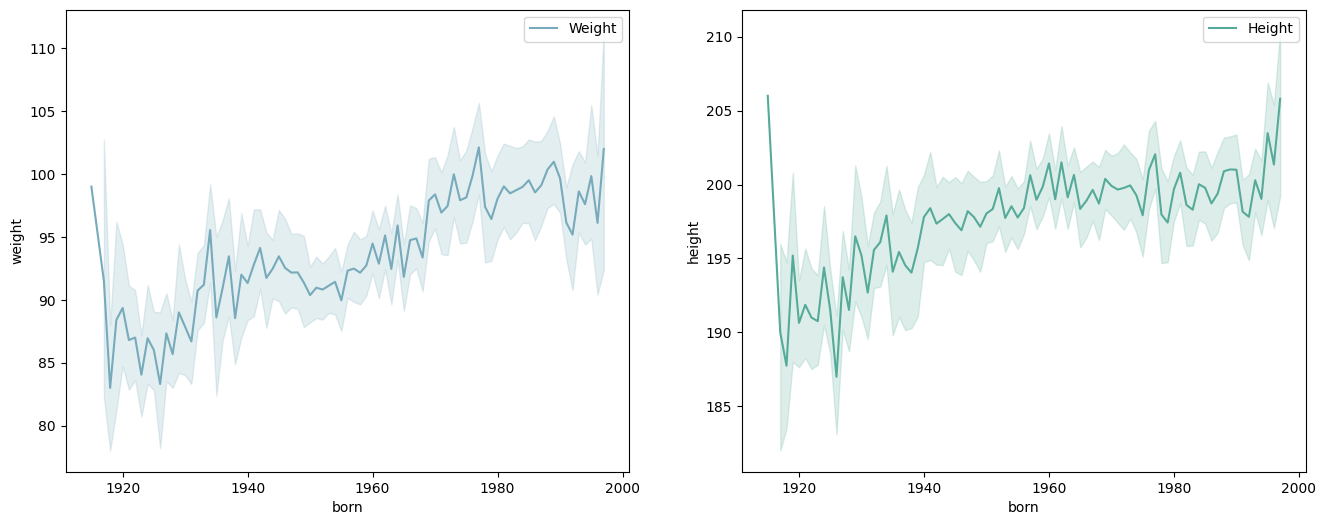

In [84]:
# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)

(ax1, ax2) = axes

# Plot the first line plot on the axis
sb.lineplot(data=players, x="born", y="weight", ax=ax1, label='Weight', color="#7AB")

# Plot the second line plot on the axis
sb.lineplot(data=players, x="born", y="height", ax=ax2, label='Height', color="#5A9")

# Show plot
plt.show()


In the graph above we can see that the height and weight of player increased every year. Good body parameters are very important features for this kind of sport.


Load Player Data csv file

In [85]:
# Read 'Player Data' csv file
players_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Ml course/NBA_Stats/player_data.csv').dropna()
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [86]:
# Prepare Player DataFrame, rename columns for correct merge
players = players.rename(columns = {"Player": "name", "collage": "college"})

# Join Player DataFrame with Player Data DataFrame by Name and College columns
merged_players_df = pd.merge(players, players_data, on=['name', 'college'], how='inner').sort_values('name')

# Rename duplicate columns
new_players_df = merged_players_df.rename(columns = {
    'height_x': 'heigth_cm',
    'height_y' : 'height_ft',
    'weight_x': 'weight_kg',
    'weight_y': 'weight_pn',
     })
new_players_df.head()

,name,heigth_cm,weight_kg,college,born,birth_city,birth_state,year_start,year_end,position,height_ft,weight_pn,birth_date
2384,Aaron Brooks,183,73,University of Oregon,1985,Seattle,Washington,2008,2018,G,6-0,161.0,"January 14, 1985"
2758,Aaron Gordon,206,99,University of Arizona,1995,San Jose,California,2015,2018,F,6-9,220.0,"September 16, 1995"
2395,Aaron Gray,213,122,University of Pittsburgh,1984,Tarzana,California,2008,2014,C,7-0,270.0,"December 7, 1984"
2813,Aaron Harrison,198,95,University of Kentucky,1994,San Antonio,Texas,2016,2017,G,6-6,210.0,"October 28, 1994"
566,Aaron James,203,95,Grambling State University,1952,New Orleans,Louisiana,1975,1979,F,6-8,210.0,"October 5, 1952"


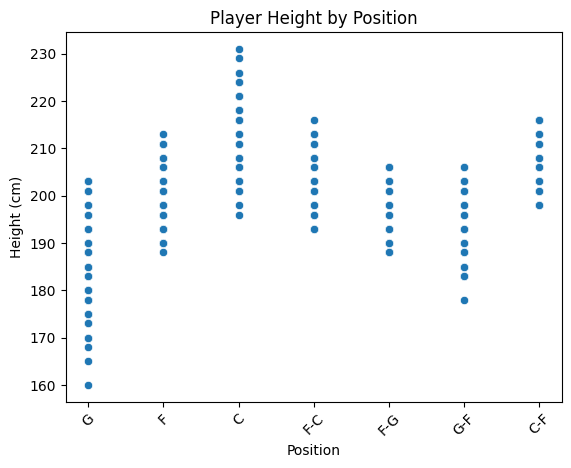

In [87]:
#Visualize the heights of the players depends on their position

sb.scatterplot(x='position', y='heigth_cm', data=new_players_df)
plt.xlabel('Position')
plt.ylabel('Height (cm)')
plt.title('Player Height by Position')
plt.xticks(rotation=45)
plt.show()

In the plot above, we can see that the central position 'C' requires players with more higth than other position and position 'G' otherwise requires less height player

<Axes: xlabel='age_start', ylabel='Count'>

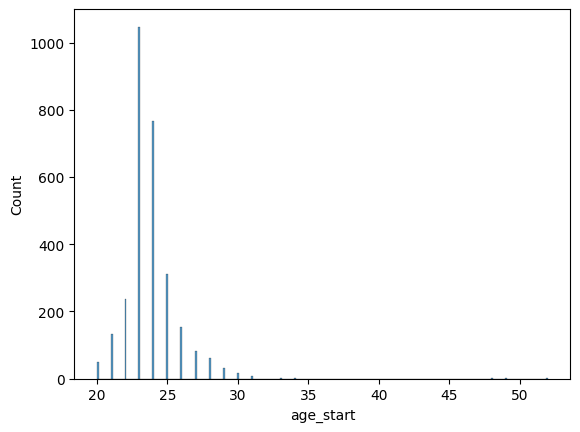

In [88]:
# Create the new feature 'Age Start'
new_players_df['age_start'] = new_players_df['year_start'] - new_players_df['born']
sb.histplot(new_players_df['age_start'])

In the plot, we can see that the more player start their career between 20 - 25 years, actually the best age for a successful career

<Axes: xlabel='year_work', ylabel='year_start'>

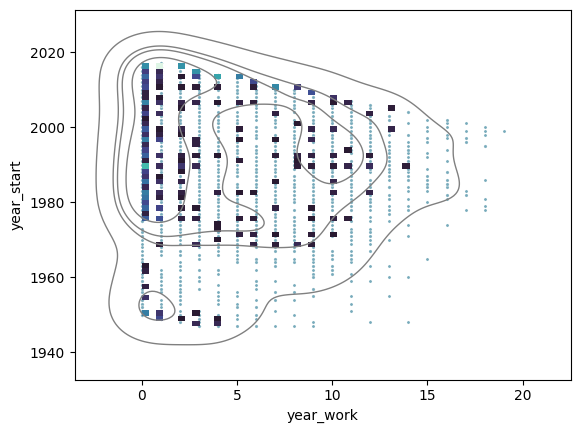

In [89]:
# Create new feature "Work years"
new_players_df['year_work'] = new_players_df['year_end'] - new_players_df['year_start']

# Visualize how long player plays in NBA
sb.scatterplot(x='year_work', y='year_start', s=5, color="#7AB", data=new_players_df)
sb.histplot(x='year_work', y='year_start', bins=50, pthresh=.4, cmap="mako", data=new_players_df)
sb.kdeplot(x='year_work', y='year_start', levels=5, color="gray", linewidths=1, data=new_players_df)

Here, we see that more players play in the NBA in less than a year. Also players who played between 1980 - 2000 year have more longer career then other

Load Season Stats data

In [90]:
# Read 'Season Stats' csv file
season_stats_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Ml course/NBA_Stats/Seasons_Stats.csv', index_col=[0])
season_stats_data.drop(['blanl', 'blank2'], axis=1, inplace=True)
season_stats_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24691 entries, 0 to 24690
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  OWS     24585 non-null  float64
 21  DWS     24585 non-null  float64
 22  WS 

<Axes: xlabel='PER', ylabel='PTS'>

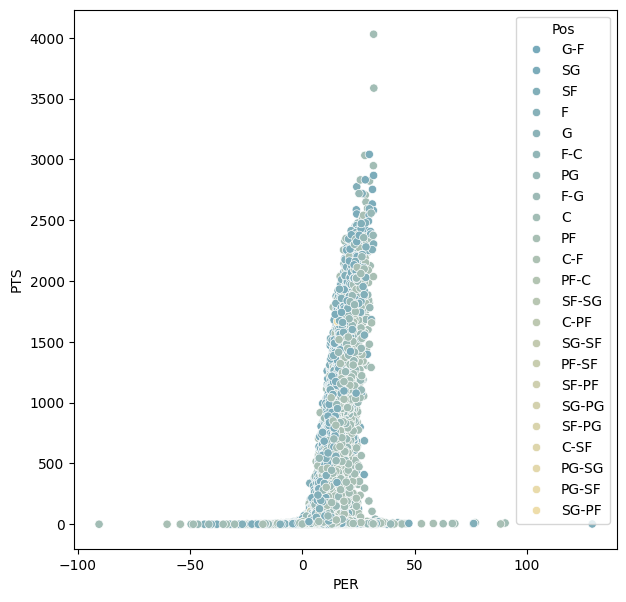

In [91]:
# Draw a scatterplot relations between PER and PTS parameter
_, ax = plt.subplots(figsize=(7, 7))
sb.scatterplot(x='PER', y="PTS", hue='Pos', data=season_stats_data, palette="blend:#7AB,#EDA", ax=ax)

In the plot we can see relations between 'Player Efficiency Rating' and how many 'Points' were achieved. High position PER value correlates with amount get point PTS.

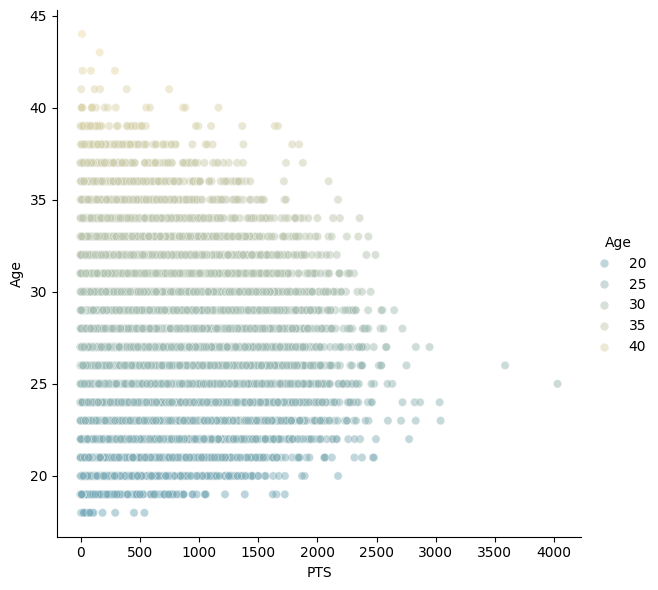

In [92]:
# Draw a replot relying on PTS and Age parameter
sb.relplot(x="PTS", y="Age", hue="Age",
            sizes=(40, 400), alpha=.5, palette="blend:#7AB,#EDA",
            height=6, data=season_stats_data)

We can see statistics of awards by age and can make conclusion that more younger people are more hard-worked and successfully.

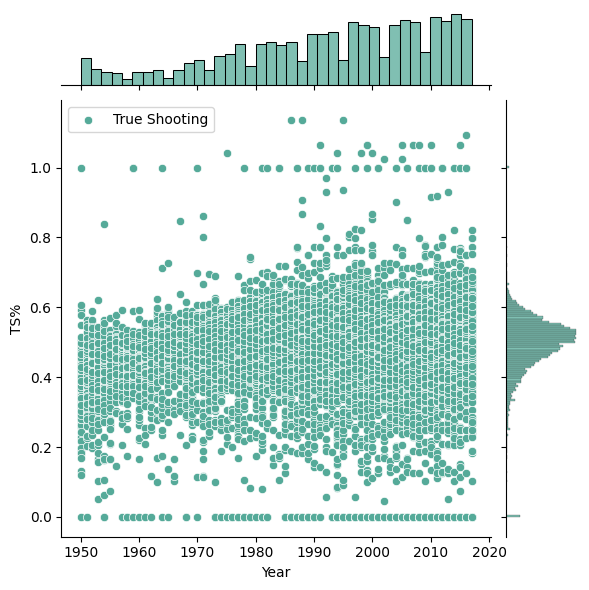

In [93]:
# Use Joint plot to draw relations between Year and True Shooting

sb.jointplot(x="Year", y="TS%", data=season_stats_data, label='True Shooting', color="#5A9", kind="scatter")

This plot shows how the 'True Shooting' increased through the years. Ongoing research and improvement of their skills help them become more better and better.

<Axes: xlabel='PTS', ylabel='AST'>

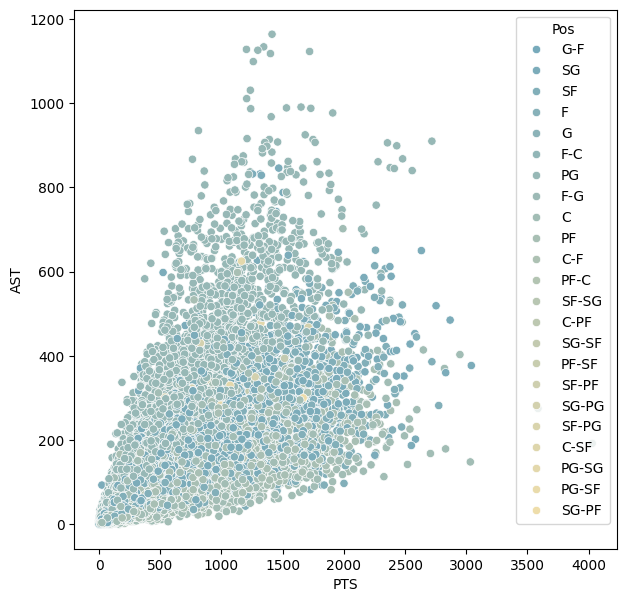

In [94]:
# Use scatter plot to draw relations PTS and AST
_, ax = plt.subplots(figsize=(7, 7))
sb.scatterplot(x="PTS", y="AST", hue="Pos",
                palette="blend:#7AB,#EDA",
                data=season_stats_data, ax=ax)

Here we can see the relationship between Points and Assists and helps to find out which position scores more point for all time

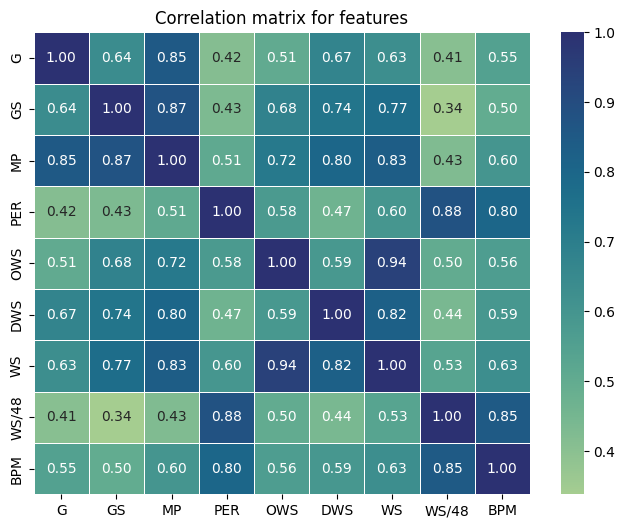

In [95]:
# Correlation matrix for features 'G', 'GS', 'MP', 'PER', 'OWS', 'DWS', 'WS', 'WS/48', 'BPM'
correlation_matrix = season_stats_data[['G', 'GS', 'MP', 'PER', 'OWS', 'DWS', 'WS', 'WS/48', 'BPM']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=.5)
plt.title('Correlation matrix for features')
plt.show()

There are we have some features that correlate with each other. 'G' and 'MP' have a correlation, so we can remove 'MP' feature and it doesn't rely on    the result. Also we can remove WS/48 feature because it correlate to 'BPM' feature and 'WS' with 'MP'. Suppose 'WS' can be deleted as well. If resullt is not good we can try to delete 'DWS' or apply some math calculation to rest features.